# Object Detection Tutorial

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table>

### Start EVA server

We are reusing the start server notebook for launching the EVA server.

In [1]:
!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb
cursor = connect_to_server()

File ‘00-start-eva-server.ipynb’ already there; not retrieving.




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


nohup eva_server > eva.log 2>&1 &



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Download the Videos

In [2]:
# Getting the video files
!wget -nc "https://www.dropbox.com/s/k00wge9exwkfxz6/ua_detrac.mp4?raw=1" -O ua_detrac.mp4

File ‘ua_detrac.mp4’ already there; not retrieving.


### Load the surveillance videos for analysis

##### We use regular expression to load all the videos into the table

In [ ]:
response = cursor.execute('DROP TABLE IF EXISTS ObjectDetectionVideos;').fetch_all().as_df()
print(response)
cursor.execute('LOAD VIDEO "ua_detrac.mp4" INTO ObjectDetectionVideos;').fetch_all().as_df()

0
0  Number of loaded VIDEO: 1

### Visualize Video

In [4]:
from IPython.display import Video
Video("ua_detrac.mp4", embed=True)

### Register YOLO Object Detector an an User-Defined Function (UDF) in EVA 

In [5]:

cursor.execute("""
            CREATE UDF IF NOT EXISTS Yolo
            TYPE  ultralytics
            'model' 'yolov8m.pt';
      """).fetch_all().as_df()

0
0  UDF Yolo already exists, nothing added.

### Run Object Detector on the video

In [6]:
response = cursor.execute("""SELECT id, Yolo(data)
                  FROM ObjectDetectionVideos 
                  WHERE id < 20""").fetch_all().as_df()

objectdetectionvideos.id  \
0                          0   
1                          1   
2                          2   
3                          3   
4                          4   
5                          5   
6                          6   
7                          7   
8                          8   
9                          9   
10                        10   
11                        11   
12                        12   
13                        13   
14                        14   
15                        15   
16                        16   
17                        17   
18                        18   
19                        19   

                                          yolo.labels  \
0   [car, car, car, car, car, car, person, car, ca...   
1   [car, car, car, car, car, car, car, car, car, ...   
2   [car, car, car, car, car, car, car, person, ca...   
3   [car, car, car, car, car, car, car, car, car, ...   
4   [car, car, car, car, car, car, car, car, car, ...   
5   [car, car, car, car, car, car, person, car, ca...   
6   [car, car, car, car, car, car, car, person, ca...   
7   [car, car, car, car, car, car, car, car, car, ...   
8   [car, car, car, car, car, car, person, car, ca...   
9   [car, car, car, car, car, car, car, person, ca...   
10  [car, car, car, car, car, car, car, person, ca...   
11  [car, car, car, car, car, car, person, car, ca...   
12  [car, car, car, car, car, car, car, person, ca...   
13  [car, car, car, car, car, car, person, car, ca...   
14  [car, car, car, car, car, car, person, car, ca...   
15  [car, car, car, car, car, car, person, car, ca...   
16  [car, car, car, car, car, car, car, person, ca...   
17  [car, car, car, car, car, car, car, person, ca...   
18  [car, car, car, car, car, car, car, person, mo...   
19  [car, car, car, car, car, person, car, car, ca...   

                                          yolo.bboxes  \
0   [[829.0, 277.0, 960.0, 360.0], [615.0, 216.0, ...   
1   [[832.0, 278.0, 960.0, 361.0], [616.0, 216.0, ...   
2   [[836.0, 279.0, 960.0, 362.0], [618.0, 216.0, ...   
3   [[839.0, 280.0, 960.0, 363.0], [619.0, 217.0, ...   
4   [[843.0, 281.0, 960.0, 364.0], [621.0, 218.0, ...   
5   [[847.0, 282.0, 960.0, 363.0], [623.0, 218.0, ...   
6   [[851.0, 283.0, 959.0, 360.0], [625.0, 219.0, ...   
7   [[855.0, 284.0, 960.0, 357.0], [626.0, 220.0, ...   
8   [[859.0, 285.0, 960.0, 357.0], [628.0, 221.0, ...   
9   [[863.0, 286.0, 960.0, 357.0], [630.0, 222.0, ...   
10  [[632.0, 223.0, 744.0, 284.0], [867.0, 287.0, ...   
11  [[871.0, 289.0, 960.0, 356.0], [634.0, 223.0, ...   
12  [[636.0, 223.0, 750.0, 287.0], [875.0, 290.0, ...   
13  [[171.0, 409.0, 291.0, 539.0], [637.0, 224.0, ...   
14  [[174.0, 405.0, 294.0, 538.0], [885.0, 291.0, ...   
15  [[888.0, 293.0, 960.0, 355.0], [177.0, 400.0, ...   
16  [[893.0, 293.0, 960.0, 355.0], [180.0, 396.0, ...   
17  [[182.0, 392.0, 296.0, 519.0], [897.0, 294.0, ...   
18  [[901.0, 295.0, 960.0, 356.0], [647.0, 225.0, ...   
19  [[648.0, 226.0, 770.0, 293.0], [906.0, 297.0, ...   

                                          yolo.scores  
0   [0.91, 0.86, 0.85, 0.83, 0.76, 0.73, 0.72, 0.7...  
1   [0.92, 0.85, 0.84, 0.83, 0.78, 0.76, 0.76, 0.7...  
2   [0.92, 0.84, 0.84, 0.82, 0.81, 0.75, 0.73, 0.7...  
3   [0.91, 0.84, 0.82, 0.8, 0.8, 0.75, 0.74, 0.72,...  
4   [0.9, 0.85, 0.83, 0.8, 0.76, 0.73, 0.72, 0.72,...  
5   [0.89, 0.86, 0.84, 0.8, 0.78, 0.74, 0.72, 0.72...  
6   [0.89, 0.87, 0.85, 0.81, 0.79, 0.73, 0.72, 0.7...  
7   [0.9, 0.87, 0.84, 0.83, 0.83, 0.79, 0.73, 0.67...  
8   [0.89, 0.88, 0.83, 0.82, 0.79, 0.71, 0.68, 0.6...  
9   [0.88, 0.87, 0.84, 0.82, 0.8, 0.75, 0.74, 0.74...  
10  [0.88, 0.88, 0.85, 0.82, 0.8, 0.79, 0.76, 0.71...  
11  [0.9, 0.9, 0.85, 0.8, 0.79, 0.77, 0.69, 0.68, ...  
12  [0.9, 0.88, 0.83, 0.81, 0.78, 0.78, 0.78, 0.67...  
13  [0.9, 0.89, 0.89, 0.83, 0.81, 0.81, 0.72, 0.71...  
14  [0.9, 0.89, 0.88, 0.84, 0.82, 0.81, 0.75, 0.72...  
15  [0.89, 0.88, 0.87, 0.84, 0.82, 0.78

### Visualizing output of the Object Detector on the video

In [7]:
import cv2
from pprint import pprint
from matplotlib import pyplot as plt

def annotate_video(detections, input_video_path, output_video_path):
    color1=(207, 248, 64)
    color2=(255, 49, 49)
    thickness=4

    vcap = cv2.VideoCapture(input_video_path)
    width = int(vcap.get(3))
    height = int(vcap.get(4))
    fps = vcap.get(5)
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') #codec
    video=cv2.VideoWriter(output_video_path, fourcc, fps, (width,height))

    frame_id = 0
    # Capture frame-by-frame
    # ret = 1 if the video is captured; frame is the image
    ret, frame = vcap.read() 

    while ret:
        df = detections
        df = df[['yolo.bboxes', 'yolo.labels']][df.index == frame_id]
        if df.size:
            dfLst = df.values.tolist()
            for bbox, label in zip(dfLst[0][0], dfLst[0][1]):
                x1, y1, x2, y2 = bbox
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                # object bbox
                frame=cv2.rectangle(frame, (x1, y1), (x2, y2), color1, thickness) 
                # object label
                cv2.putText(frame, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color1, thickness) 
                # frame label
                cv2.putText(frame, 'Frame ID: ' + str(frame_id), (700, 500), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color2, thickness) 
            video.write(frame)

            # Stop after twenty frames (id < 20 in previous query)
            if frame_id == 20:
                break

            # Show every fifth frame
            if frame_id % 5 == 0:
                plt.imshow(frame)
                plt.show()

        
        frame_id+=1
        ret, frame = vcap.read()

    video.release()
    vcap.release()

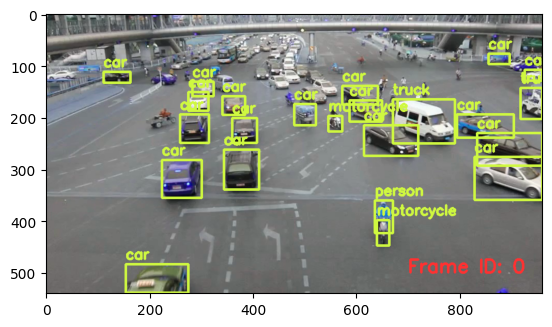

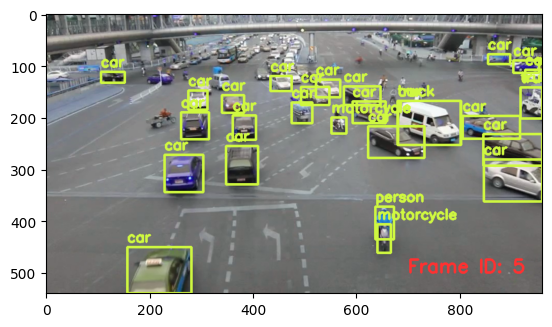

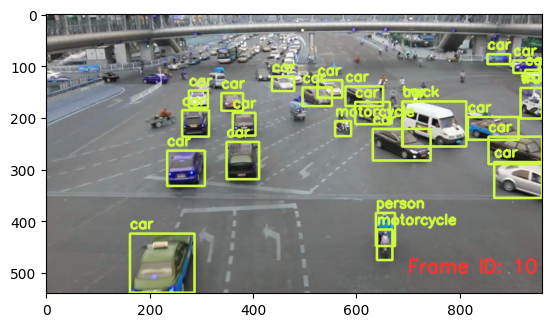

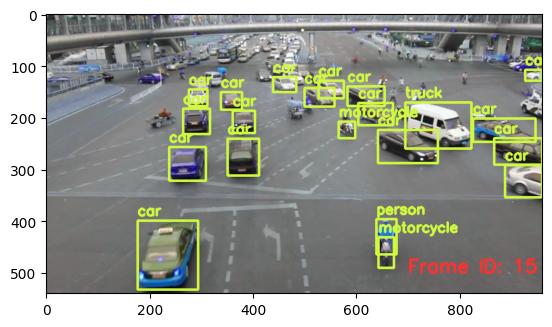

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\tI\x95mdat\x00\x00\…

In [8]:
from ipywidgets import Video, Image
input_path = 'ua_detrac.mp4'
output_path = 'video.mp4'

annotate_video(response, input_path, output_path)
Video.from_file(output_path)

### Dropping an User-Defined Function (UDF)

In [9]:
cursor.execute("DROP UDF IF EXISTS Yolo;").fetch_all().as_df()

0
0  UDF Yolo successfully dropped